# Multiple Gaussian Puff Models

The `IntPuff` model treats a release as a sequence of $n$ gaussian puffs, each one corresponding to $\frac{1}{n}$ of the total mass of the release.

$$ c\left(x,y,z,t\right) = \sum_{i}^{n-1} { {Q_i \Delta t} \over n } { { \exp \left( -\frac{1}{2} \left( {x - u \left( t - i \delta t \right) } \over \sigma_x \right)^2 \right) } \over { \sqrt{2\pi} \sigma_x } } { { \exp \left( -\frac{1}{2} \left( {y} \over \sigma_y \right)^2 \right) } \over { \sqrt{2\pi} \sigma_y } }\\ \times { { \exp \left( -\frac{1}{2} \left( {z - h} \over \sigma_z \right)^2 \right) + \exp \left( -\frac{1}{2} \left( {z + h} \over \sigma_z \right)^2 \right) } \over { \sqrt{2\pi} \sigma_z } } $$


With 
+ emission rate, $Q_i$
+ total duration, $\Delta t$
+ puff interval, $ \delta t = {\Delta t \over n} $
+ windspeed, $u$
+ downwind dispersion, $\sigma_x$
+ crosswind dispersion, $\sigma_y$
+ downwind dispersion, $\sigma_z$

## Dispersion Parameters

The dispersion parameters are the same as used for the `GaussianPlume` model.


## Example

This scenario is adapted from CCPS *Guidelines for Consequence Analysis of
Chemical Releases*, CCPS, pg 47.

Suppose we wish to model the dispersion of gaseous propane from a leak from a storage tank, where the leak is from a 10 mm hole that is 3.5 m above the ground and the propane is at 25°C and 4barg. Assume the discharge coefficient $c_{D} = 0.85$

In [1]:
using GasDispersion

Patm = 101325 # Pa
P1 = 4e5 + Patm # Pa
T1 = 25 + 273.15 # K

propane = Substance(name = :propane,
            gas_density = 9.7505, # Propane, NIST Webbook
            liquid_density = 526.13, # Propane, NIST Webbook
            reference_temp= T1,
            reference_pressure= P1,
            boiling_temp = 231.04, # Propane, NIST Webbook
            latent_heat = 425740.0, # J/kg, 
            gas_heat_capacity = 1678.0, # J/kg/K, 
            liquid_heat_capacity = 2520.0) # J/kg/K

scn = scenario_builder(propane, JetSource; 
       phase = :gas,
       diameter = 0.01, # m
       dischargecoef = 0.85,
       k = 1.15,         # heat capacity ratio, from Crane's
       temperature = T1, # K
       pressure = P1,    # Pa
       height = 3.5,     # m, height of hole above the ground
       duration = 10)    # s, duration of the leak

Substance: propane 
Release conditions:
    ṁ: 0.09426204511744017 kg/s 
    Δt: 10 s 
    d: 0.01 m 
    u: 199.34706765725818 m/s 
    h: 3.5 m 
    P: 287952.6877282304 Pa 
    T: 277.3488372093023 K 
    f_l: 0.0  
Atmospheric conditions:
    P: 101325 Pa 
    T: 298.15 K 
    Rs: 287.0500676 J/kg/K 
    u: 1.5 m/s 
    h: 10 m 
    stability: ClassF  


We now model the release by a sequence of 100 gaussian puffs. Essentially chopping the 10s over which the release happens into 0.1s intervals and releasing one puff per interval at a time for 10s.

In [2]:
pf_100 = puff(scn, IntPuff; n=100);

Plotting this we see that instead of one large spherical mass the release is stretched out. The overall concentration seen at any point is less than if this was modeled as a single puff, but the duration over which the concentration is high is also longer.

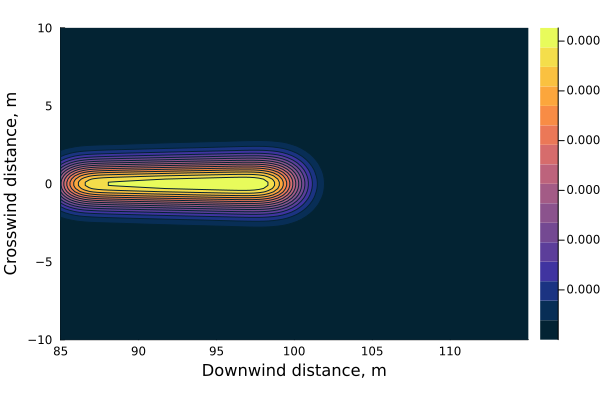

In [3]:
using Plots

u = 1.5 # m/s, windspeed
x = 100 # m, downwind distance to point of interest
t = x/u

plot(pf_100, t, xlims=(0.85*x,1.15*x), ylims=(-10,10), aspect_ratio=:equal)

## Integrated Puff

As an approximation to the true limiting behavior as $n \to \infty$, the sum is replaced with the integral from $t - \Delta t$ to $t$ and integrated assuming the dispersion parameters are all constant. This is not strictly true as the dispersion parameters are correlated to the downwind location of the cloud center, which is a function of time, but the approximation is reasonable and easy to calculate.

In [4]:
pf_∞ = puff(scn, IntPuff);

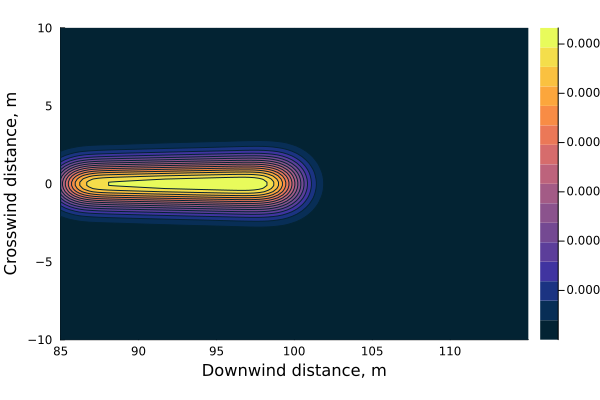

In [5]:
plot(pf_∞, t, xlims=(0.85*x,1.15*x), ylims=(-10,10), aspect_ratio=:equal)